<a href="https://colab.research.google.com/github/Jamalun/Data_Capstone_Design/blob/master/Financial_News_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
# 엑셀 파일 불러오기, header = none
df = pd.read_excel("/content/drive/MyDrive/Colab/Kaggle_translated.xlsx", names = ["sentiment","english", "korean" ],header=None)

In [ ]:
df

,sentiment,english,korean
0,neutral,"According to Gran , the company has no plans t...","Gran에 따르면, 비록 그 회사가 성장하고 있는 곳이지만, 그 회사는 러시아에 모..."
1,neutral,Technopolis plans to develop in stages an area...,"테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 100,0..."
2,negative,The international electronic industry company ...,국제적인 전자 산업 회사 Elcoteq는 그것의 Talinn 시설로부터 10명의 직...
3,positive,With the new production plant the company woul...,새로운 생산 공장과 함께 회사는 수요의 예상되는 증가를 충족시키기 위하여 그것의 능...
4,positive,According to the company 's updated strategy f...,"2009-2012년 회사의 최신 전략에 따르면, Basware는 순매출의 10%-2..."
...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,런던 마켓워치 -- FTSE 100에 대한 은행 주식의 반등이 더 큰 약세를 상쇄하...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,린쿠스키아의 맥주 판매량은 416만 리터로 6.5퍼센트 감소했고 카우노 알루스의 맥...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,"영업 이익은 EUR 12.3 mn의 선박 판매 이익을 포함하여, 2007년에 EUR..."
4844,negative,Net sales of the Paper segment decreased to EU...,종이 부문의 순매출은 2008년 2/4분기에 EUR 241.1 mn에서 2009년 ...


# Mecab 설치

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4 MB 18.1 MB/s 
     |████████████████████████████████| 448 kB 26.2 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-10-28 10:01:23--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff0

# 데이터 라벨링

In [ ]:
import numpy as np

In [ ]:
df

,sentiment,english,korean
0,neutral,"According to Gran , the company has no plans t...","Gran에 따르면, 비록 그 회사가 성장하고 있는 곳이지만, 그 회사는 러시아에 모..."
1,neutral,Technopolis plans to develop in stages an area...,"테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 100,0..."
2,negative,The international electronic industry company ...,국제적인 전자 산업 회사 Elcoteq는 그것의 Talinn 시설로부터 10명의 직...
3,positive,With the new production plant the company woul...,새로운 생산 공장과 함께 회사는 수요의 예상되는 증가를 충족시키기 위하여 그것의 능...
4,positive,According to the company 's updated strategy f...,"2009-2012년 회사의 최신 전략에 따르면, Basware는 순매출의 10%-2..."
...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,런던 마켓워치 -- FTSE 100에 대한 은행 주식의 반등이 더 큰 약세를 상쇄하...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,린쿠스키아의 맥주 판매량은 416만 리터로 6.5퍼센트 감소했고 카우노 알루스의 맥...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,"영업 이익은 EUR 12.3 mn의 선박 판매 이익을 포함하여, 2007년에 EUR..."
4844,negative,Net sales of the Paper segment decreased to EU...,종이 부문의 순매출은 2008년 2/4분기에 EUR 241.1 mn에서 2009년 ...


In [ ]:
labels = []
for sentiment in df['sentiment']:
  if (sentiment == 'neutral'):
    labels.append(1)
  if (sentiment == 'negative'):
    labels.append(0)
  if (sentiment == 'positive'):
    labels.append(2)

df['label'] = labels
  

In [ ]:
# 라벨링이 0,1,2로 잘 되었음을 확인
df['label'].unique()

array([1, 0, 2])

In [ ]:
df

,sentiment,english,korean,label
0,neutral,"According to Gran , the company has no plans t...","Gran에 따르면, 비록 그 회사가 성장하고 있는 곳이지만, 그 회사는 러시아에 모...",1
1,neutral,Technopolis plans to develop in stages an area...,"테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 100,0...",1
2,negative,The international electronic industry company ...,국제적인 전자 산업 회사 Elcoteq는 그것의 Talinn 시설로부터 10명의 직...,0
3,positive,With the new production plant the company woul...,새로운 생산 공장과 함께 회사는 수요의 예상되는 증가를 충족시키기 위하여 그것의 능...,2
4,positive,According to the company 's updated strategy f...,"2009-2012년 회사의 최신 전략에 따르면, Basware는 순매출의 10%-2...",2
...,...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,런던 마켓워치 -- FTSE 100에 대한 은행 주식의 반등이 더 큰 약세를 상쇄하...,0
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,린쿠스키아의 맥주 판매량은 416만 리터로 6.5퍼센트 감소했고 카우노 알루스의 맥...,1
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,"영업 이익은 EUR 12.3 mn의 선박 판매 이익을 포함하여, 2007년에 EUR...",0
4844,negative,Net sales of the Paper segment decreased to EU...,종이 부문의 순매출은 2008년 2/4분기에 EUR 241.1 mn에서 2009년 ...,0


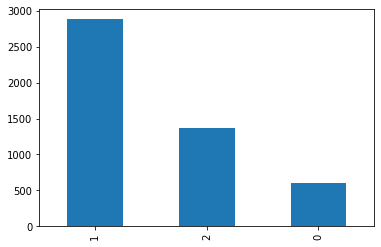

In [ ]:
import matplotlib.pyplot as plt
df['label'].value_counts().plot(kind = 'bar')

In [ ]:
# 중립 2879개, 긍정 1363개, 부정 603개
df['label'].value_counts()

1    2879
2    1363
0     604
Name: label, dtype: int64

In [ ]:
#총 데이터의 개수
df['korean'].nunique()

4832

In [ ]:
# NULL 값 유무 확인
print(df.isnull().values.any())

False


# train, test 셋 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 42)
print("훈련 데이터 개수 : ", len(train_data))
print("테스트 데이터 개수 : ", len(test_data))

훈련 데이터 개수 :  3876
테스트 데이터 개수 :  970


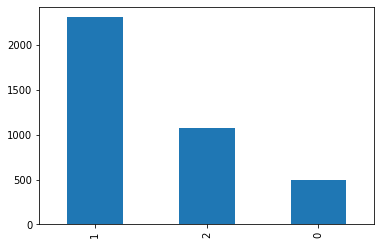

In [ ]:
# train set 분포
train_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
train_data

,sentiment,english,korean,label
432,neutral,"In Russia , Raisio 's Food Division 's home ma...","러시아에서, Raisio's Food Division의 홈마켓은 블라디보스토크까지 ...",1
3071,neutral,Operators only need to learn how to use one de...,"운영자들은 음성 지시 작업을 포함하여, 다양한 수준의 애플리케이션에 대해 하나의 기...",1
289,positive,The company expects its net sales in the first...,그 회사는 2008년 상반기 순매출이 전년 수준에 이를 것으로 예상하고 있다.,2
2588,neutral,The bridge will be 1.2 km long and is located ...,다리는 1.2 킬로미터 길이일 것입니다 그리고 도로 E20에 의해 Anasmotet...,1
4121,neutral,Nokia and Capcom announced that Resident Evil ...,노키아와 캡콤은 레지던트 Evil Degeneration이 올해 말에 N-Gage로...,1
...,...,...,...,...
4426,negative,"The currency effect had a 3.0 pct , or 20 mln ...","통화 효과는 수익에 부정적인 영향을 미치는 3.0 pct, 또는 20 mln 유로 ...",0
466,positive,`` Lidskoe Pivo 's investment program foresees...,"Mikshis는 ""Lidskoe Pivo의 투자 프로그램은 생산의 통합 현대화, 운...",2
3092,neutral,Products include Consumer Electronics devices ...,"제품에는 기반구조 시스템, 모듈 및 기타 산업 부문 제품과 같은 시스템 솔루션 제품...",1
3772,neutral,The bridge is part of the highway 14 developme...,그 다리는 고속도로 14 개발 프로젝트의 일부이다.,1


In [ ]:
train_data.iloc[0]

sentiment                                              neutral
english      In Russia , Raisio 's Food Division 's home ma...
korean       러시아에서, Raisio's Food Division의 홈마켓은 블라디보스토크까지 ...
label                                                        1
Name: 432, dtype: object

In [ ]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0    494
1      1   2308
2      2   1074


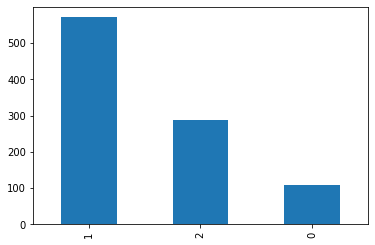

In [ ]:
#test set 분포
test_data['label'].value_counts().plot(kind = 'bar')

# 데이터 정제하기

In [ ]:
# 정규 표현식 사용하여 한국어 이외 모두 제거
import re
train_data['korean'] = train_data['korean'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['korean'].replace('', np.nan, inplace=True)
train_data = train_data.dropna(how='any') # Null 값 제거, 'how'= any 행에서 하나라도 결측치가 있다면 행삭제
print(train_data.isnull().sum())

sentiment    0
english      0
korean       0
label        0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
# test data도 마찬가지
test_data.drop_duplicates(subset = ['korean'], inplace=True) # 중복 제거
test_data['korean'] = test_data['korean'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['korean'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print(test_data.isnull().sum())
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

sentiment    0
english      0
korean       0
label        0
dtype: int64
전처리 후 테스트용 샘플의 개수 : 970


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

# 토큰화

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
# 불용어 지정
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [ ]:
# 형태소 분리 예시
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '뻔']


In [ ]:
#morphs로 형태소 추출
train_data['tokenized'] = train_data['korean'].apply(mecab.morphs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# 불용어 처리
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train_data

,sentiment,english,korean,label,tokenized
432,neutral,"In Russia , Raisio 's Food Division 's home ma...",러시아에서 의 홈마켓은 블라디보스토크까지 쭉 뻗어 있습니다,1,"[러시아, 에서, 홈, 마켓, 블라디보스토크, 까지, 쭉, 뻗, 어, 있, 습니다]"
3071,neutral,Operators only need to learn how to use one de...,운영자들은 음성 지시 작업을 포함하여 다양한 수준의 애플리케이션에 대해 하나의 기기...,1,"[운영, 자, 음성, 지시, 작업, 포함, 여, 다양, 수준, 애플리케이션, 대해,..."
289,positive,The company expects its net sales in the first...,그 회사는 년 상반기 순매출이 전년 수준에 이를 것으로 예상하고 있다,2,"[그, 회사, 년, 상반기, 순, 매출, 전년, 수준, 이를, 것, 으로, 예상, 있]"
2588,neutral,The bridge will be 1.2 km long and is located ...,다리는 킬로미터 길이일 것입니다 그리고 도로 에 의해 과 도로 에 의해 에 새로운...,1,"[다리, 킬로미터, 길이, 일, 것, 입니다, 그리고, 도로, 의해, 도로, 의해,..."
4121,neutral,Nokia and Capcom announced that Resident Evil ...,노키아와 캡콤은 레지던트 이 올해 말에 로 출시될 것이라고 발표했다,1,"[노키아, 캡콤, 레지던트, 올해, 말, 로, 출시, 될, 것, 라고, 발표, 했]"
...,...,...,...,...,...
4426,negative,"The currency effect had a 3.0 pct , or 20 mln ...",통화 효과는 수익에 부정적인 영향을 미치는 또는 유로 달러 를 가지고 있...,0,"[통화, 효과, 수익, 부정, 적, 영향, 미치, 또는, 유로, 달러, 가지, 있,..."
466,positive,`` Lidskoe Pivo 's investment program foresees...,는 의 투자 프로그램은 생산의 통합 현대화 운송 및 물류 인프라 업데이트 그리고 ...,2,"[투자, 프로그램, 생산, 통합, 현대, 화, 운송, 및, 물류, 인프라, 업데이트..."
3092,neutral,Products include Consumer Electronics devices ...,제품에는 기반구조 시스템 모듈 및 기타 산업 부문 제품과 같은 시스템 솔루션 제품뿐...,1,"[제품, 기반, 구조, 시스템, 모듈, 및, 기타, 산업, 부문, 제품, 같, 시스..."
3772,neutral,The bridge is part of the highway 14 developme...,그 다리는 고속도로 개발 프로젝트의 일부이다,1,"[그, 다리, 고속도, 로, 개발, 프로젝트, 일부]"


In [ ]:
test_data['tokenized'] = test_data['korean'].apply(mecab.morphs)
test_data['tokenized'] = test_data['korean'].apply(lambda x: [item for item in x if item not in stopwords])

# 단어와 길이 분포 확인하기

In [ ]:
from collections import Counter

In [ ]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values) #hstack은 가로로 합침
neutral_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 2]['tokenized'].values)

In [ ]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('년', 288), ('에서', 245), ('했', 195), ('습니다', 193), ('유로', 138), ('핀란드', 113), ('으로', 110), ('로', 109), ('월', 108), ('것', 102), ('감소', 98), ('이익', 88), ('였', 83), ('회사', 81), ('분기', 73), ('었', 70), ('만', 68), ('기간', 66), ('영업', 65), ('그', 64)]


In [ ]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('년', 483), ('했', 450), ('에서', 407), ('습니다', 368), ('것', 281), ('유로', 260), ('증가', 246), ('로', 229), ('회사', 216), ('으로', 203), ('있', 199), ('핀란드', 187), ('월', 169), ('말', 169), ('였', 167), ('할', 163), ('적', 162), ('그', 141), ('다고', 139), ('그것', 139)]


In [ ]:
neutral_word_count = Counter(neutral_words)
print(neutral_word_count.most_common(20))

[('것', 664), ('있', 599), ('년', 599), ('습니다', 598), ('에서', 485), ('회사', 477), ('했', 426), ('입니다', 415), ('그', 393), ('할', 348), ('되', 341), ('월', 332), ('핀란드', 330), ('로', 310), ('으로', 286), ('그리고', 272), ('일', 267), ('합니다', 265), ('적', 265), ('유로', 263)]


긍정 문장의 평균 길이 : 17.009310986964618
부정 문장의 평균 길이 : 15.441295546558704
중립 문장의 평균 길이 : 15.576072821846553


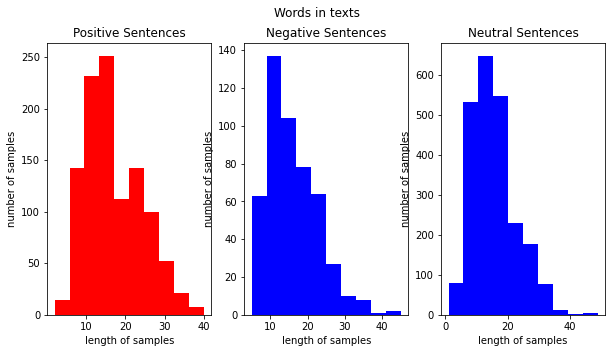

In [ ]:
# matplotlib 시각화
# 부정 문장보다는 긍정 문장이 더 길게 작성
fig,(ax1,ax2, ax3) = plt.subplots(1,3,figsize=(10,5))

text_len = train_data[train_data['label']==2]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Sentences')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 문장의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Sentences')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 문장의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax3.hist(text_len, color='blue')
ax3.set_title('Neutral Sentences')
fig.suptitle('Words in texts')
ax3.set_xlabel('length of samples')
ax3.set_ylabel('number of samples')
print('중립 문장의 평균 길이 :', np.mean(text_len))


plt.show()

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

# 정수 인코딩
등장 빈도 1회인 단어는 제외시킴.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 5807
등장 빈도가 1번 이하인 희귀 단어의 수: 2658
단어 집합에서 희귀 단어의 비율: 45.77234372309282
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.298884036875304


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 3151


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')  #oov 는 out of vocabulary
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[113, 4, 1585, 905, 1, 48, 1, 1, 67, 7, 3], [51, 156, 769, 1193, 493, 45, 28, 358, 298, 368, 209, 237, 839, 90, 335, 26, 2296, 99, 173], [14, 8, 2, 322, 40, 36, 218, 298, 1367, 6, 13, 134, 7]]


In [ ]:
print(X_test[:3])

[[14, 1, 2402, 206, 1, 1, 199, 189, 744, 1, 1, 2211, 1, 1188, 1230, 67, 1, 2712, 2022, 1, 29, 1269, 1, 372, 395, 29, 10, 1, 17, 67, 1, 7, 22, 1, 1230], [1, 1, 415, 1, 1, 1, 1, 372, 428, 28, 1, 507, 85, 1, 2724, 1501, 1683, 641, 1, 1, 1, 1, 1, 1, 1, 16, 1, 6, 577, 1230], [2, 1, 1, 1, 1, 2531, 1, 26, 1, 263, 1, 1, 2693, 1, 26, 1, 263, 1, 1, 1, 1, 1, 1, 27, 1, 1, 381, 1, 1855, 2099, 1, 1, 1, 1, 1, 7, 22, 1, 1230]]


# 패딩
서로 다른 길이의 샘플들의 길이를 동일하게 맞춰주는 패딩 작업을 진행.
전체 데이터에서 가장 길이가 긴 문장과 전체 데이터의 길이 분포를 알아보기.

문자의 최대 길이 : 49
문장의 평균 길이 : 15.956129032258065


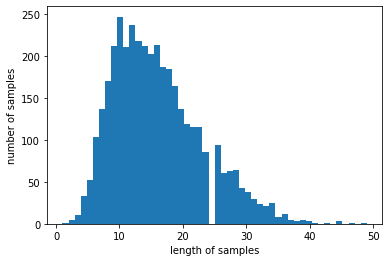

In [ ]:
print('문자의 최대 길이 :',max(len(l) for l in X_train))
print('문장의 평균 길이 :',sum(map(len, X_train))/len(X_train))   #python map함수 사용
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# 패딩 함수 정의
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
# 훈련용 문장의 99.9% 이하가 45 이하의 길이를 가짐
max_len = 45
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 45 이하인 샘플의 비율: 99.9483870967742


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# pad_sequence()는 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채움.
X_train = pad_sequences(X_train, maxlen = max_len) 
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
X_train.shape 

(3875, 45)

# 원-핫 인코딩

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_test)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


# GRU를 이용한 분류

In [ ]:
X_train[:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,  113,    4, 1585,  905,    1,   48,    1,    1,   67,    7,
           3],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   51,  156,  769, 1193,  493,   45,   28,
         358,  298,  368,  209,  237,  839,   90,  335,   26, 2296,   99,
         173],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   14,
           8,    2,  322,   40,   36,  218,  298, 1367,    6,   13,  134,
           7]], dtype=int32)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, GRU, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim)) #임베딩 층 추가, 단어를 밀집 벡터로 만듦. 3D 텐서로 리턴
model.add(GRU(hidden_units)) # GRU 층 추가 
model.add(Dense(3, activation='softmax'))

In [ ]:
# 검증데이터손실(val_loss)가 증가하면 과적합 징후이므로, 검증데이터 손실이 3회 증가하면 early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3) #verbose로 학습이 되는 과정을 볼 수 있다, patience는 개선이 없더라도 기다려줄 횟수
# 검증 데이터의 정확도가 이전보다 좋아진 경우에만 모델 저장 
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only= True) 

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 100)         315100    
_________________________________________________________________
gru_4 (GRU)                  (None, 128)               88320     
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 387       
Total params: 403,807
Trainable params: 403,807
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# loss function으로는 categorical_crossentropy를 사용함. 이는 모델의 예측값과 실제값에 대해서 두 확률 분포 사이의 거리를 최소화하도록 훈련
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  #rmsprop
history = model.fit(X_train, y_train, epochs=30, callbacks=[es, mc], batch_size= 64, validation_split= 0.2)

Epoch 1/30
49/49 [==============================] - 4s 27ms/step - loss: 0.0610 - accuracy: 0.9803 - val_loss: 1.4606 - val_accuracy: 0.6981

Epoch 00001: val_accuracy did not improve from 0.74194
Epoch 2/30
49/49 [==============================] - 1s 17ms/step - loss: 0.0397 - accuracy: 0.9884 - val_loss: 1.6084 - val_accuracy: 0.7045

Epoch 00002: val_accuracy did not improve from 0.74194
Epoch 3/30
49/49 [==============================] - 1s 17ms/step - loss: 0.0304 - accuracy: 0.9923 - val_loss: 1.6250 - val_accuracy: 0.7045

Epoch 00003: val_accuracy did not improve from 0.74194
Epoch 4/30
49/49 [==============================] - 1s 17ms/step - loss: 0.0261 - accuracy: 0.9939 - val_loss: 1.8289 - val_accuracy: 0.6968

Epoch 00004: val_accuracy did not improve from 0.74194
Epoch 00004: early stopping


In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test, batch_size = 64)[1])) #evaluate로 test

16/16 [==============================] - 1s 6ms/step - loss: 1.0486 - accuracy: 0.5732

 테스트 정확도: 0.5732


선행연구에서 제시한 기준 70%에 아직 도달 못했습니다.



